In [1]:
!pip uninstall keras tensorflow -y

Found existing installation: keras 3.11.3
Uninstalling keras-3.11.3:
  Successfully uninstalled keras-3.11.3
Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0


In [2]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl (331.9 MB)
Using cached keras-3.11.3-py3-none-any.whl (1.4 MB)

   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   --------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.3 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.20.0 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [28]:
#processing with opencv:
image_size=64
data="C:\\Aishwarya Garugapally\\OneDrive\\Downloads\\archive\\xray_dataset_covid19\\train"

In [52]:
x=[] #x is the basket to keep cleaned data
y=[] # y is like a basket to keep labels(0=normal,1=pneumonia)
for label,folder in enumerate(["NORMAL","PNEUMONIA"]):
    folder_path=os.path.join(data,folder)
    for file in os.listdir(folder_path):
        img_path=os.path.join(folder_path,file)
        try:
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img=cv2.resize(img,(image_size,image_size))
            img=cv2.GaussianBlur(img,(5,5),0)
            img=img/255.0
            x.append(img)
            y.append(label)
        except:
            continue   

In [53]:
x=np.array(x).reshape(-1,image_size,image_size,1)
y=np.array(y)

In [54]:
print("Dataset shape:",x.shape,y.shape)

Dataset shape: (148, 64, 64, 1) (148,)


In [55]:
#ste4: Train/test:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)
y_train = to_categorical(y_train, 2)
y_val   = to_categorical(y_val, 2)
y_test  = to_categorical(y_test, 2)#0=[1,0] healthy 1=[0,1]pneumonia 2 number of classes that means 2 images  2 classes  columns in the vector

In [62]:
print("Train shape:", x_train.shape, y_train.shape)
print("Validation shape:", x_val.shape, y_val.shape)
print("Pseudo Test shape:", x_test.shape, y_test.shape)

Train shape: (118, 64, 64, 1) (118, 2)
Validation shape: (15, 64, 64, 1) (15, 2)
Pseudo Test shape: (15, 64, 64, 1) (15, 2)


In [56]:
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(image_size,image_size,1)),MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation="relu"),
    Dropout(0.3),
    Dense(2,activation="softmax")])

In [57]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,826 (3.14 MB)

 Trainable params: 821,826 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(x_train, y_train,validation_data=(x_val, y_val),epochs=10,batch_size=16,verbose=1)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9746 - loss: 0.1110 - val_accuracy: 1.0000 - val_loss: 0.0734
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9661 - loss: 0.1109 - val_accuracy: 1.0000 - val_loss: 0.0591
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9661 - loss: 0.0906 - val_accuracy: 1.0000 - val_loss: 0.0489
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.9661 - loss: 0.0892 - val_accuracy: 1.0000 - val_loss: 0.0455
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9661 - loss: 0.0648 - val_accuracy: 1.0000 - val_loss: 0.0456
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9831 - loss: 0.0660 - val_accuracy: 1.0000 - val_loss: 0.0323
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9831 - loss: 0.0503 - val_accuracy: 1.0000 - val_loss: 0.0232
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9576 - loss: 0.0775 - val_accuracy: 0.9333 - val_loss: 0.090

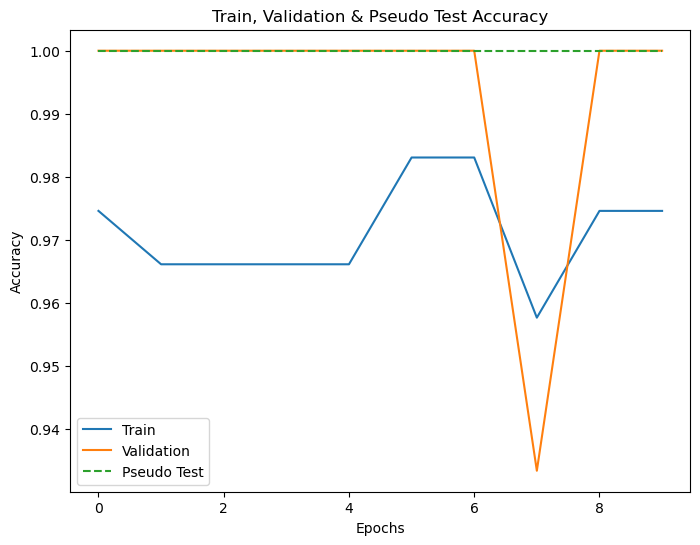

In [70]:
# Step 5: Plot accuracy
pseudo_test_line = [test_acc]*len(history.history['accuracy'])

plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(pseudo_test_line, label='Pseudo Test', linestyle='--')
plt.title("Train, Validation & Pseudo Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [59]:
loss, acc = model.evaluate(x_val, y_val)
print(f"Validation_score: {acc*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 1.0000 - loss: 0.0892
Validation_score: 100.00%


In [65]:
# Step 6: Evaluate on pseudo test set
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Pseudo Test Accuracy: {test_acc*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 1.0000 - loss: 0.0679
Pseudo Test Accuracy: 100.00%


In [61]:
model.save("pneumonia_cnn_model.keras")
print("Model saved successfully!")

Model saved successfully!


In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
# Load your trained model
model = load_model("pneumonia_cnn_model.keras")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [3]:
test_image_path="C:\\Aishwarya Garugapally\\OneDrive\\Pictures\\sensors-21-05940-g001.png"

In [4]:
image = cv2.imread(test_image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (64, 64))       # same size as training
blurred = cv2.GaussianBlur(resized, (5, 5), 0)
normalized = blurred / 255.0               # normalize
input_img = normalized.reshape(1, 64, 64, 1) 

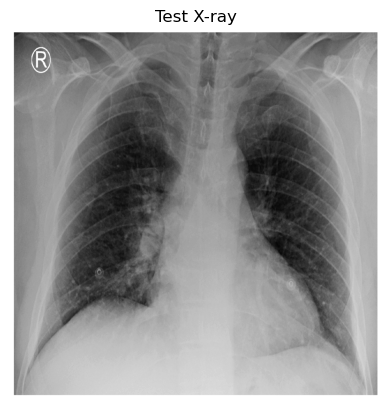

In [5]:
# Display image
plt.imshow(gray, cmap='gray')
plt.title("Test X-ray")
plt.axis('off')
plt.show()

In [6]:
prediction = model.predict(input_img)
predicted_class = np.argmax(prediction)
if predicted_class == 0:
    print("Prediction: NORMAL (Healthy Lungs)")
else:
    print("Prediction: PNEUMONIA Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
Prediction: PNEUMONIA Detected


In [7]:
print("Confidence Scores:", prediction)

Confidence Scores: [[0.02529484 0.97470516]]
